In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
pd.set_option('display.max_rows', None)   

In [2]:
df=pd.read_csv(r"f:\data\Bengaluru_House_Data.csv")

In [3]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [4]:
df.shape

(13320, 9)

In [57]:
13320-46

13274

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df.drop({'area_type','society','balcony','availability'},axis='columns')

In [7]:
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_7808\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3.bhk>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [39]:
df3['total_sqft'].apply(lambda x:is_float(x)).head()

0    True
1    True
2    True
3    True
4    True
Name: total_sqft, dtype: bool

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [41]:
df3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [20]:
#data cleaning

In [21]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [42]:
convert_sqft_to_num('34.46Sq. Meter')

In [24]:
convert_sqft_to_num('2166')

2166.0

In [25]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3

In [56]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [26]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [27]:
(2100+2850)/2

2475.0

In [28]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [29]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [59]:
df4.shape

(13246, 6)

In [30]:
len(df5.location.unique())

1304

In [62]:
df5.location.value_counts()>10

other                          True
Whitefield                     True
Sarjapur  Road                 True
Electronic City                True
Kanakpura Road                 True
Thanisandra                    True
Yelahanka                      True
Uttarahalli                    True
Hebbal                         True
Marathahalli                   True
Raja Rajeshwari Nagar          True
Bannerghatta Road              True
Hennur Road                    True
7th Phase JP Nagar             True
Haralur Road                   True
Electronic City Phase II       True
Rajaji Nagar                   True
Chandapura                     True
Bellandur                      True
KR Puram                       True
Hoodi                          True
Electronics City Phase 1       True
Yeshwanthpur                   True
Begur Road                     True
Sarjapur                       True
Harlur                         True
Kasavanhalli                   True
Banashankari                

In [32]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [44]:
len(location_stats[location_stats<=10])

1052

In [48]:
location_more_then_10=location_stats[location_stats>=10]
location_more_then_10.agg('count')

254

In [64]:
location_less_then_10=location_stats[location_stats<=10]
location_less_then_10

location
Basapura                                              10
1st Block Koramangala                                 10
Gunjur Palya                                          10
Kalkere                                               10
Sector 1 HSR Layout                                   10
Dairy Circle                                          10
Naganathapura                                         10
Sadashiva Nagar                                       10
Nagadevanahalli                                       10
BTM 1st Stage                                         10
Nagappa Reddy Layout                                  10
Dodsworth Layout                                      10
Ganga Nagar                                           10
2nd Phase JP Nagar                                     9
Volagerekallahalli                                     9
Yemlur                                                 9
4th Block Koramangala                                  9
Lingarajapuram        

In [53]:
len(df5.location.unique())

242

In [50]:
1304-1293

11

In [36]:
df5.location=df5.location.apply(lambda x:'other' if x in location_less_then_10 else x)
len(df5.location.unique())

242

In [55]:
df5.shape

(13246, 7)

In [65]:
df5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

# outliers

In [75]:
df5[df5.total_sqft/df5.bhk<100].head()

location       size  total_sqft  bath  price  bhk  price_per_sqft
45     HSR Layout  8 Bedroom       600.0   9.0  200.0    8    33333.333333
349         other  3 Bedroom        11.0   3.0   74.0    3   672727.272727
770         other  9 Bedroom       600.0   9.0  190.0    9    31666.666667
857   Vijayanagar  8 Bedroom       600.0   4.0   72.0    8    12000.000000
992  Rajaji Nagar  4 Bedroom       315.0   4.0   90.0    4    28571.428571

In [78]:
df5.shape

(13246, 7)

In [87]:
df6=df5[~(df5.total_sqft/df5.bhk<100)]
df6.shape

(13206, 7)

In [91]:
df6.price_per_sqft.describe()

count     13160.000000
mean       6666.830652
std        4508.228739
min         267.829813
25%        4262.948207
50%        5425.015738
75%        7285.438507
max      176470.588235
Name: price_per_sqft, dtype: float64

In [97]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_outliers(df6)
df7.shape

(10927, 7)

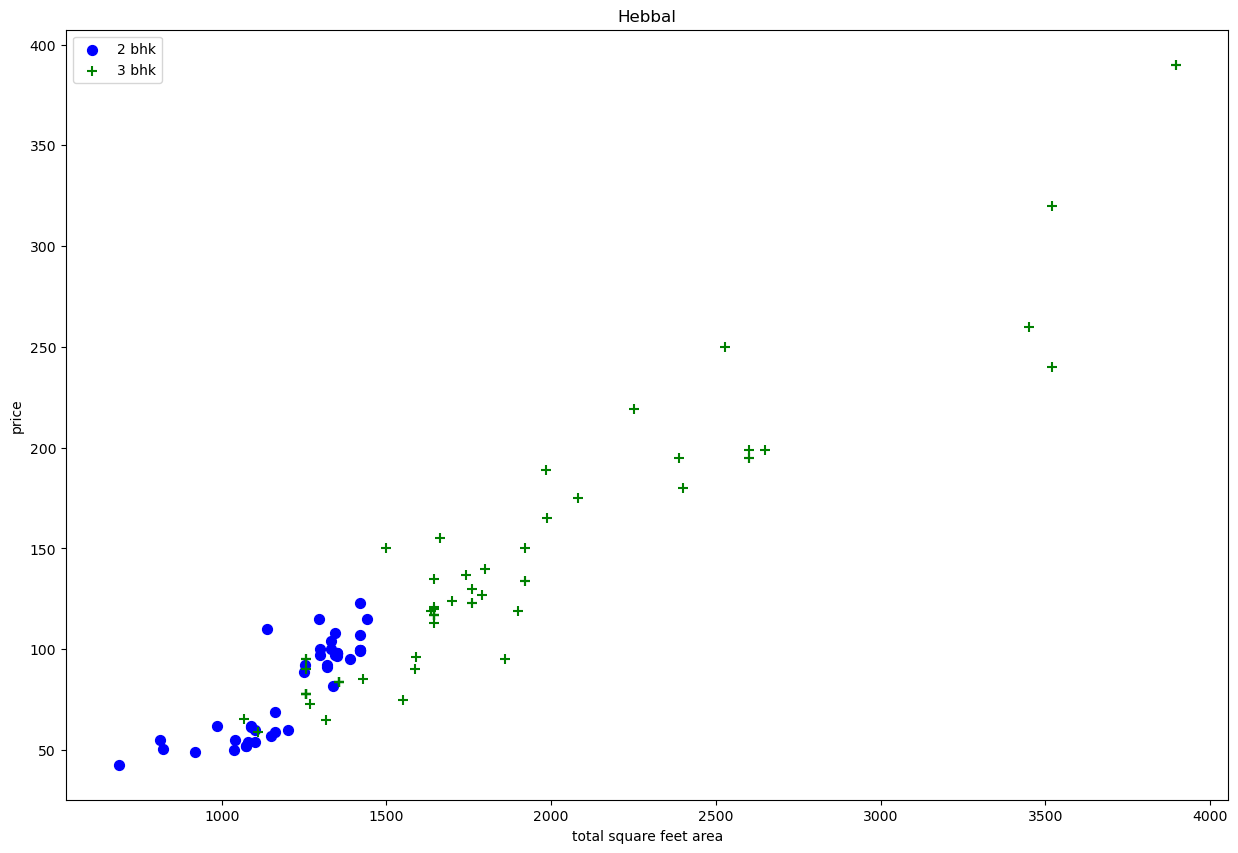

In [103]:
#plot graphs whose 2bhk is higher then 3bhk

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 bhk',s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
    


plot_scatter_chart(df7,'Hebbal')

In [107]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df8 = remove_bhk_outliers(df7)
df8.shape

(7815, 7)

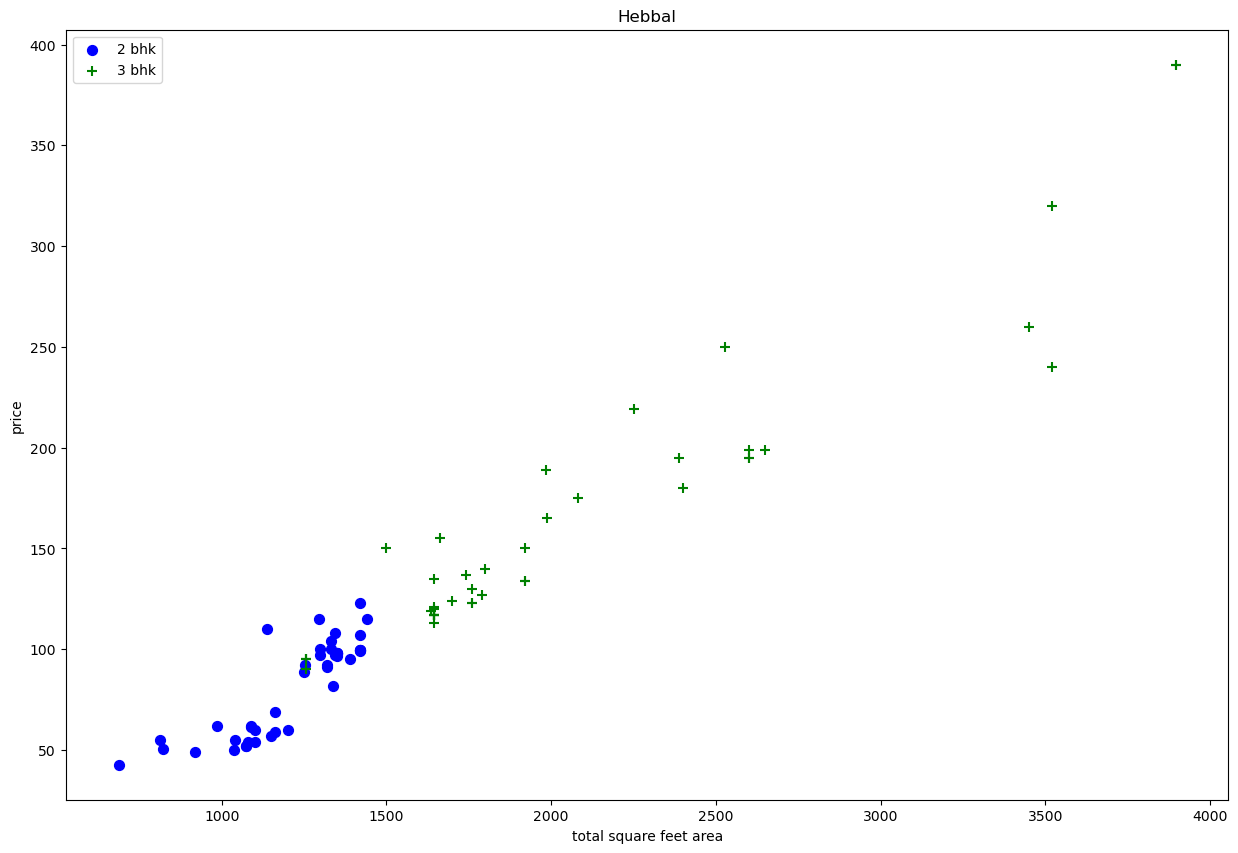

In [108]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'count')

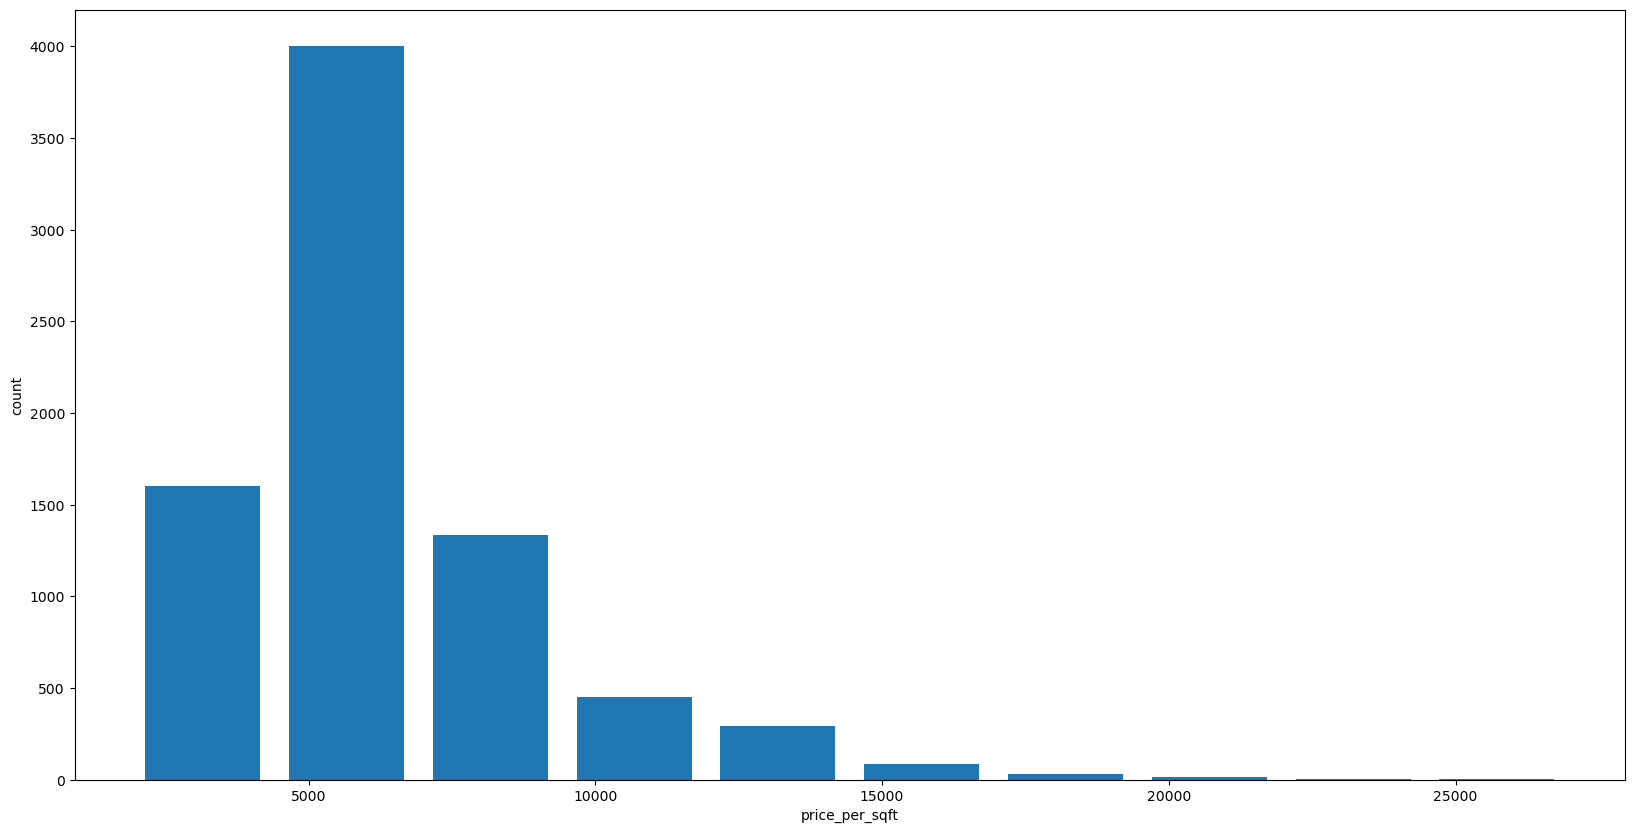

In [110]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel('count')

In [111]:
df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 27., 11.,
       16., 13.])

In [112]:
df8[df8.bath>10]

location        size  total_sqft  bath  price  bhk  \
5640   Neeladri Nagar      10 BHK      4000.0  12.0  160.0   10   
8748            other      27 BHK      8000.0  27.0  230.0   27   
8753            other  11 Bedroom      1200.0  11.0  170.0   11   
8801            other   8 Bedroom       990.0  12.0  120.0    8   
9102            other      16 BHK     10000.0  16.0  550.0   16   
9907            other      11 BHK      6000.0  12.0  150.0   11   
10269           other      13 BHK      5425.0  13.0  275.0   13   

       price_per_sqft  
5640      4000.000000  
8748      2875.000000  
8753     14166.666667  
8801     12121.212121  
9102      5500.000000  
9907      2500.000000  
10269     5069.124424

Text(0, 0.5, 'count')

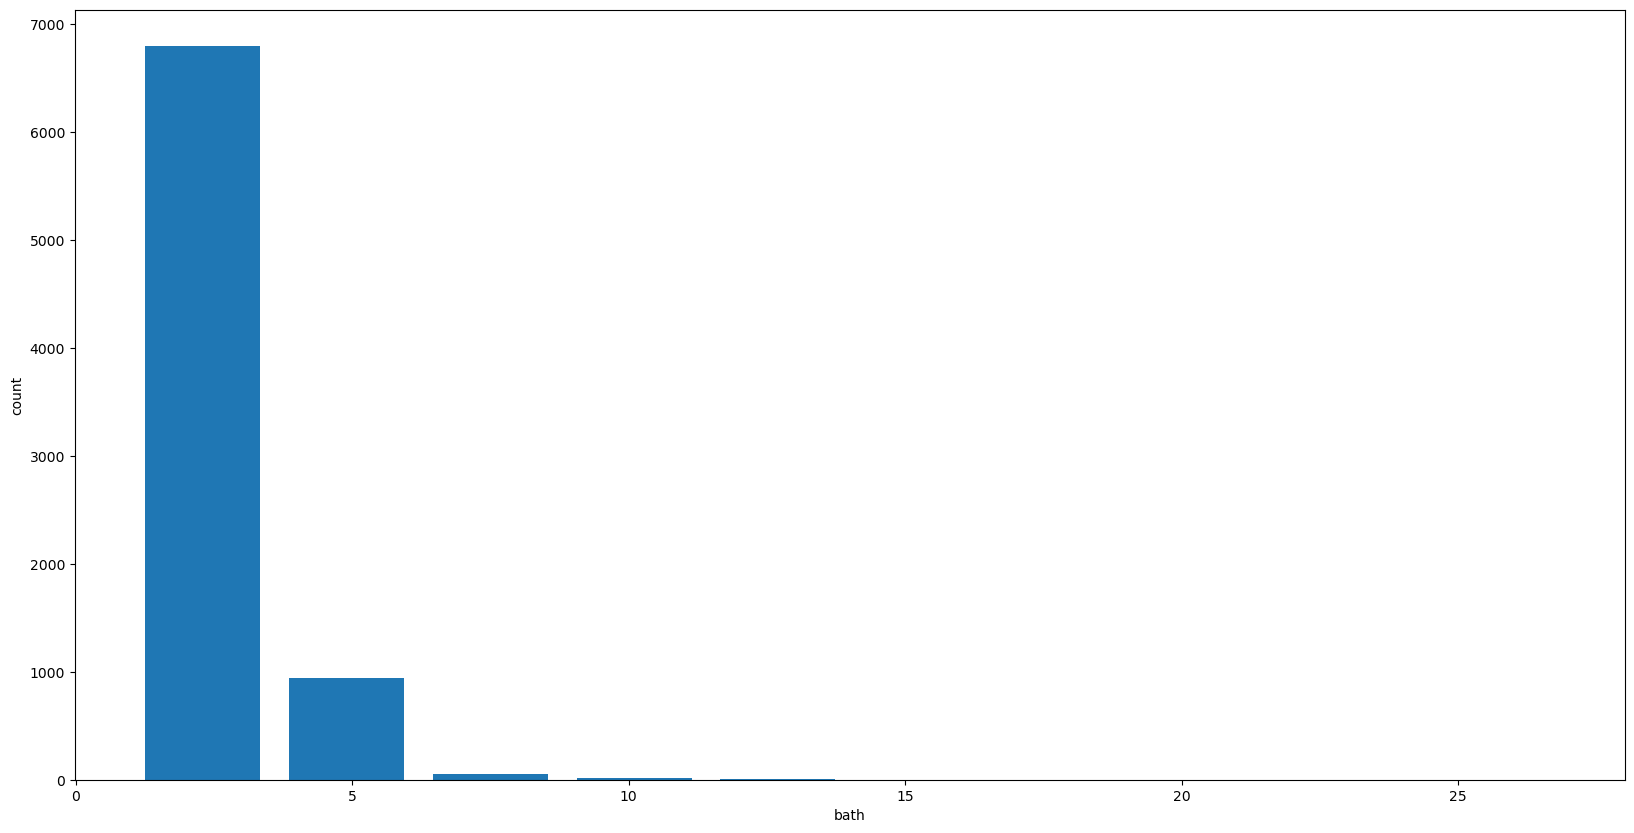

In [116]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("bath")
plt.ylabel('count')

In [117]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath  price  bhk  price_per_sqft
1634      Chamrajpet  6 Bedroom      1500.0   9.0  230.0    6    15333.333333
1770   Chikkabanavar  4 Bedroom      2460.0   7.0   80.0    4     3252.032520
5599      Nagasandra  4 Bedroom      7000.0   8.0  450.0    4     6428.571429
7139     Thanisandra      3 BHK      1806.0   6.0  116.0    3     6423.034330
8801           other  8 Bedroom       990.0  12.0  120.0    8    12121.212121
10283          other  6 Bedroom      1200.0   9.0  122.0    6    10166.666667

In [120]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7729, 7)

In [122]:
df10=df9.drop(['size',"price_per_sqft"],axis='columns')

In [124]:
df10.shape
df10.head(3)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1200.0   6.0  125.0    6

In [125]:
pd.get_dummies(df10.location)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                        1                   0                          0   
1                        1                   0                          0   
2                        1                   0                          0   
3                        1                   0                          0   
4                        1                   0                          0   
5                        1                   0                          0   
6                        1                   0                          0   
7                        1                   0                          0   
8                        1                   0                          0   
10                       0                   1                          0   
11                       0                   1                          0   
12                       0                   1                          0   
14                       0                   1                          0   
15                       0                   1                          0   
16                       0                   1                          0   
17                       0                   1                          0   
18                       0                   1                          0   
19                       0                   1                          0   
20                       0                   1                          0   
21                       0                   1                          0   
22                       0                   1                          0   
23                       0                   1                          0   
24                       0                   1                          0   
26                       0                   1                          0   
28                       0                   1                          0   
29                       0                   0                          1   
30                       0                   0                          1   
31                       0                   0                          1   
32                       0                   0                          1   
33                       0                   0                          1   
34                       0                   0                          1   
35                       0                   0                          1   
36                       0                   0                          1   
37                       0                   0                          0   
40                       0                   0                          0   
41                       0                   0                          0   
42                       0                   0                          0   
43                       0                   0                          0   
44                       0                   0                          0   
45                       0                   0                          0   
46                       0                   0                          0   
47                       0                   0                          0   
48                       0                   0                          0   
49                       0                   0                          0   
50                       0                   0                          0   
51                       0                   0                          0   
52                       0                   0                          0   
53                       0                   0                          0   
55                       0                   0                          0   
56                       0                   0                          0   
57                       0                   0                          0   
58 

In [126]:
#onehot encoding